In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

import gc
import myutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
class lgrWrapper():
    def __init__(self):
        return
    
    def init_model(self):
        self.clf = LogisticRegression(C = 0.0001)     
        return    
    def __repr__(self):
        return 'logReg'

    def train(self, trn_x, trn_y):
        self.clf.fit(trn_x, trn_y)

    def predict(self, x):
        result = self.clf.predict_proba(x)[:, 1]
        return result
    
    def get_coef(self):
        return self.clf.coef_.reshape(-1,1)

lgr = lgrWrapper()

In [6]:
data, test, y = myutil.get_train_test_label()

(307511, 826)
(48744, 826)


In [7]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, lgr)

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold  1 AUC : 0.636675


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold  2 AUC : 0.629409


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold  3 AUC : 0.653013


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold  4 AUC : 0.624862


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold  5 AUC : 0.636193
Full AUC score 0.636054


LogisticRegression
Index(['DAYS_BIRTH', 'install_DAYS_ENTRY_PAYMENT_sum',
       'install_DAYS_INSTALMENT_sum', 'credit_bal_AMT_BALANCE_max',
       'DAYS_REGISTRATION', 'bureau_DAYS_CREDIT_sum',
       'credit_bal_AMT_BALANCE_mean', 'bureau_DAYS_CREDIT_ENDDATE_sum',
       'credit_bal_AMT_CREDIT_LIMIT_ACTUAL_min', 'AMT_CREDIT',
       'bureau_DAYS_ENDDATE_FACT_sum', 'DAYS_EMPLOYED',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'DAYS_ID_PUBLISH',
       'credit_bal_AMT_PAYMENT_max', 'prev_app_AMT_CREDIT_sum',
       'install_AMT_INSTALMENT_sum', 'bureau_DAYS_CREDIT_min',
       'prev_app_DAYS_FIRST_DUE_sum', 'bureau_DAYS_CREDIT_ENDDATE_min',
       'bureau_DAYS_ENDDATE_FACT_min', 'prev_app_DAYS_DECISION_sum',
       'bureau_DAYS_CREDIT_mean', 'install_AMT_PAYMENT_max',
       'credit_bal_AMT_PAYMENT_sum', 'prev_app_AMT_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_min',
       'credit_bal_AMT_DRAWINGS_POS_CURRENT_max',
       'install_DAYS_ENTRY_PAYMENT_min', 'install_DAYS_INSTALMENT_min'

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


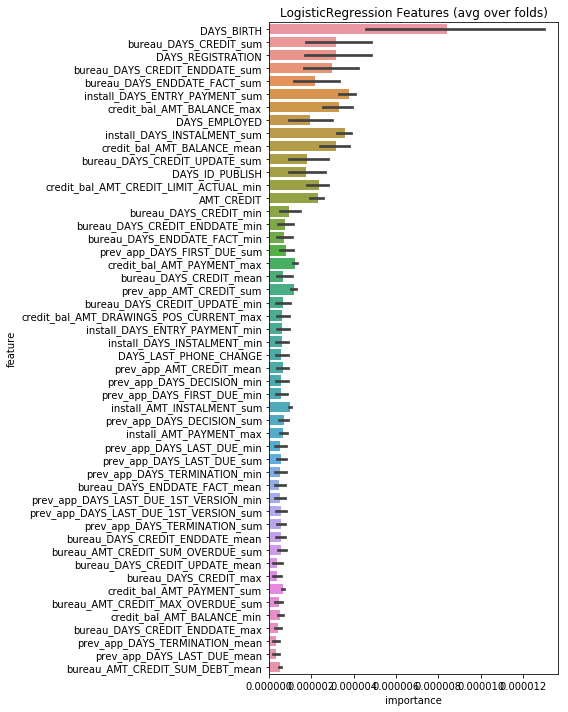

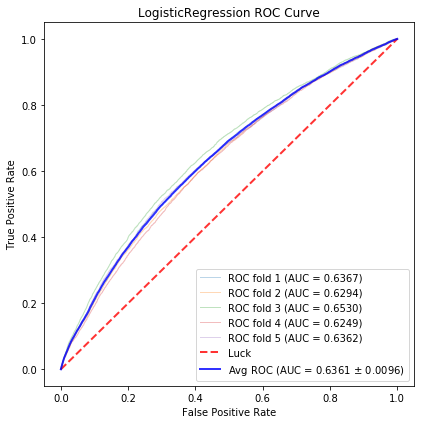

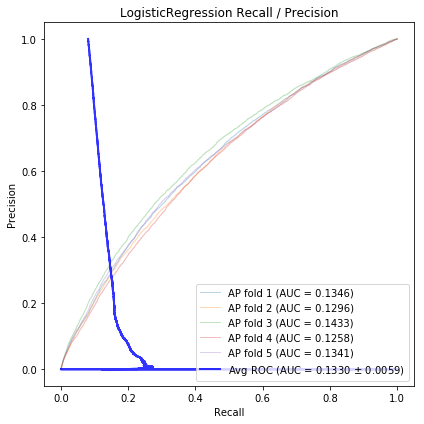

In [8]:
title = 'LogisticRegression'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)